In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
df_EX = pd.read_csv("Extremely_Hot_Days 2009-2013.csv")
df_EX

,County Name,Census Tract,# Extremely Hot Days
0,Adams,53001950100,1
1,Adams,53001950200,1
2,Adams,53001950300,1
3,Adams,53001950400,1
4,Adams,53001950500,1
...,...,...,...
7245,Yakima,53077940002,1
7246,Yakima,53077940003,1
7247,Yakima,53077940004,1
7248,Yakima,53077940005,1


Text(0.5, 0, 'County Names')

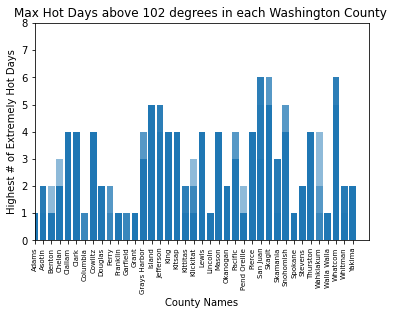

In [34]:
df_EX = pd.read_csv("Extremely_Hot_Days 2009-2013.csv")
plt.figure()
plt.xlim([0,40])
plt.ylim([0,8])
plt.bar(df['County Name'],df['# Extremely Hot Days'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)
plt.title("Max Hot Days above 102 degrees in each Washington County ")
plt.ylabel("Highest # of Extremely Hot Days")
plt.xlabel("County Names")


In [42]:
by_county_Extreme_not_agg = df_EX.groupby('County Name') ["# Extremely Hot Days"].sum()

In [43]:
by_county_Extreme_not_agg #cannot use because columns are not agg...

County Name
Adams             12
Asotin            23
Benton           112
Chelan            72
Clallam          176
Clark            608
Columbia           3
Cowlitz          146
Douglas           36
Ferry              5
Franklin          39
Garfield           3
Grant             48
Grays Harbor      96
Island           198
Jefferson         55
King            2606
Kitsap           344
Kittitas          30
Klickitat         14
Lewis            139
Lincoln            7
Mason             92
Okanogan          46
Pacific           44
Pend Oreille      11
Pierce          1174
San Juan          54
Skagit           295
Skamania          25
Snohomish       1066
Spokane          264
Stevens           21
Thurston         343
Wahkiakum          7
Walla Walla       36
Whatcom          336
Whitman           35
Yakima           148
Name: # Extremely Hot Days, dtype: int64

In [44]:
df_by_county_Extreme = df_EX.groupby('County Name', as_index=False).agg({"# Extremely Hot Days": "sum"})

In [45]:
df_by_county_Extreme

,County Name,# Extremely Hot Days
0,Adams,12
1,Asotin,23
2,Benton,112
3,Chelan,72
4,Clallam,176
5,Clark,608
6,Columbia,3
7,Cowlitz,146
8,Douglas,36
9,Ferry,5


In [61]:
df_Fires = pd.read_csv("Wildfires_09-13.csv")

In [62]:
df_Fires

,County Name,# of Fires,Acres Burned,Percent Area Burned
0,Adams,0,0,0.00
1,Asotin,0,0,0.00
2,Benton,0,0,0.00
3,Chelan,3,2281,0.12
4,Clallam,0,0,0.00
...,...,...,...,...
190,Wahkiakum,0,0,0.00
191,Walla Walla,0,0,0.00
192,Whatcom,0,0,0.00
193,Whitman,0,0,0.00


In [80]:
df_by_county_Fires = df_Fires.groupby('County Name', as_index=False).agg({"# of Fires": "sum"})

In [81]:
df_by_county_Fires

,County Name,# of Fires
0,Adams,1
1,Asotin,3
2,Benton,4
3,Chelan,38
4,Clallam,0
5,Clark,0
6,Columbia,0
7,Cowlitz,0
8,Douglas,6
9,Ferry,11


In [82]:
df_main = pd.merge(df_by_county_Extreme, df_by_county_Fires)

In [83]:
df_main

,County Name,# Extremely Hot Days,# of Fires
0,Adams,12,1
1,Asotin,23,3
2,Benton,112,4
3,Chelan,72,38
4,Clallam,176,0
5,Clark,608,0
6,Columbia,3,0
7,Cowlitz,146,0
8,Douglas,36,6
9,Ferry,5,11


Text(0.5, 1.0, 'Plot for all the counties')

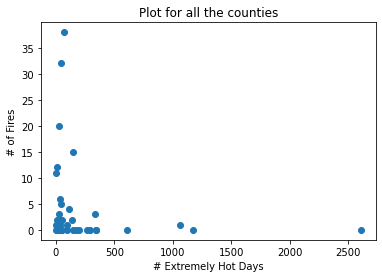

In [151]:
plt.plot(df_main['# Extremely Hot Days'],df_main['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')
plt.title('Plot for all the counties')

(0.0, 30.0)

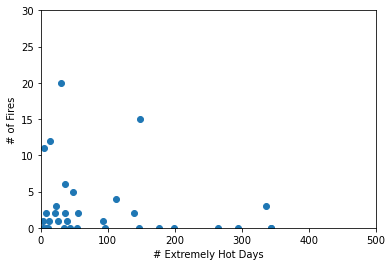

In [106]:
plt.plot(df_main['# Extremely Hot Days'],df_main['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')
plt.xlim([0,500])
plt.ylim([0,30])

In [107]:
df_main.corr()

,# Extremely Hot Days,# of Fires
# Extremely Hot Days,1.000000,-0.170881
# of Fires,-0.170881,1.000000


In [108]:
df_main.describe()

,# Extremely Hot Days,# of Fires
count,39.000000,39.000000
mean,224.846154,4.230769
std,470.115302,8.554659
min,3.000000,0.000000
25%,24.000000,0.000000
50%,54.000000,1.000000
75%,187.000000,3.000000
max,2606.000000,38.000000


In [116]:
df_CentralWa = df_main.loc[[2,3,8,12,18,19,23,38], :]

In [118]:
df_EasternWa = df_main.loc[[0,1,6,9,10,11,21,25,31,32,35,37], :]

In [119]:
df_WesternWa = df_main.loc[[4,5,7,13,14,15,16,17,20,22,24,26,27,28,29,30,33,34,36], :]

In [117]:
df_CentralWa


,County Name,# Extremely Hot Days,# of Fires
2,Benton,112,4
3,Chelan,72,38
8,Douglas,36,6
12,Grant,48,5
18,Kittitas,30,20
19,Klickitat,14,12
23,Okanogan,46,32
38,Yakima,148,15


In [120]:
df_EasternWa

,County Name,# Extremely Hot Days,# of Fires
0,Adams,12,1
1,Asotin,23,3
6,Columbia,3,0
9,Ferry,5,11
10,Franklin,39,1
11,Garfield,3,1
21,Lincoln,7,2
25,Pend Oreille,11,0
31,Spokane,264,0
32,Stevens,21,2


In [121]:
df_WesternWa

,County Name,# Extremely Hot Days,# of Fires
4,Clallam,176,0
5,Clark,608,0
7,Cowlitz,146,0
13,Grays Harbor,96,0
14,Island,198,0
15,Jefferson,55,2
16,King,2606,0
17,Kitsap,344,0
20,Lewis,139,2
22,Mason,92,1


Text(0, 0.5, '# of Fires')

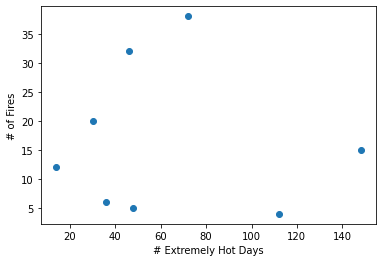

In [123]:
plt.plot(df_CentralWa['# Extremely Hot Days'],df_CentralWa['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')


Text(0, 0.5, '# of Fires')

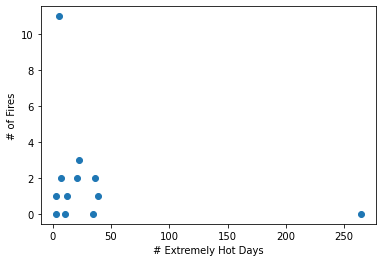

In [124]:
plt.plot(df_EasternWa['# Extremely Hot Days'],df_EasternWa['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')


Text(0, 0.5, '# of Fires')

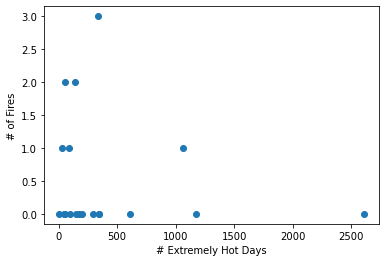

In [125]:
plt.plot(df_WesternWa['# Extremely Hot Days'],df_WesternWa['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')

([<matplotlib.axis.XTick at 0x231daaab8b0>,
 [Text(0, 0, 'West'), Text(0, 0, 'Central'), Text(0, 0, 'Eastern')])

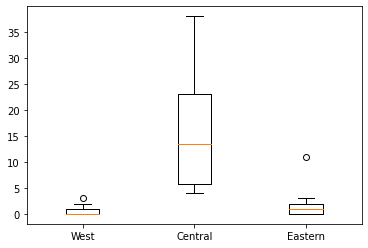

In [126]:
plt.boxplot([df_WesternWa['# of Fires'],df_CentralWa['# of Fires'],df_EasternWa['# of Fires']])
plt.xticks([1,2,3],['West',"Central","Eastern"])
plt.xlim([0,500])
plt.ylim([0,30])

{'whiskers': [<matplotlib.lines.Line2D at 0x231dab56970>,
 'caps': [<matplotlib.lines.Line2D at 0x231dab64070>,
 'boxes': [<matplotlib.lines.Line2D at 0x231dab56610>],
 'medians': [<matplotlib.lines.Line2D at 0x231dab64730>],
 'fliers': [<matplotlib.lines.Line2D at 0x231dab64a30>],
 'means': []}

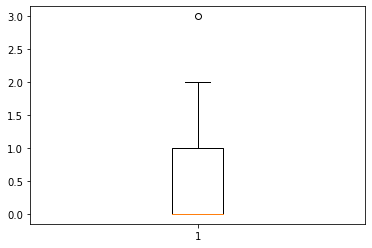

In [128]:
plt.boxplot(df_WesternWa['# of Fires'])

{'whiskers': [<matplotlib.lines.Line2D at 0x231dbb81850>,
 'caps': [<matplotlib.lines.Line2D at 0x231dbb81f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x231dbb814f0>],
 'medians': [<matplotlib.lines.Line2D at 0x231dbb8c610>],
 'fliers': [<matplotlib.lines.Line2D at 0x231dbb8c910>],
 'means': []}

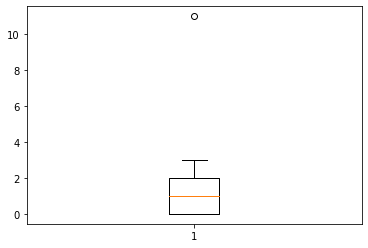

In [129]:
plt.boxplot(df_EasternWa['# of Fires'])

(array([1., 2., 2., 0., 1., 0., 0., 1., 0., 1.]),
 array([ 14. ,  27.4,  40.8,  54.2,  67.6,  81. ,  94.4, 107.8, 121.2,
        134.6, 148. ]),
 <a list of 10 Patch objects>)

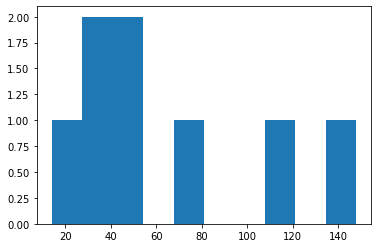

In [133]:
plt.hist(df_CentralWa['# Extremely Hot Days'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231DA9A21C0>,
      dtype=object)

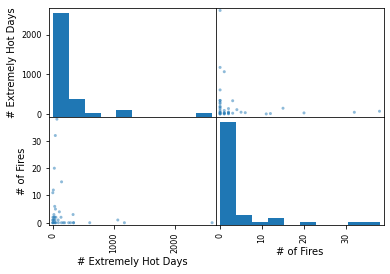

In [134]:
pd.plotting.scatter_matrix(df_main)

In [138]:
X = np.array(df_main["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_main["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

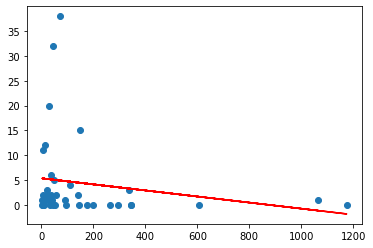

In [142]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')

IndexError: index 38 is out of bounds for axis 0 with size 38

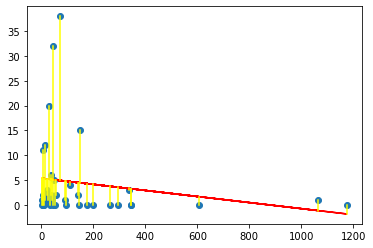

In [144]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')
for i in range(50):
    plt.plot([X[i],X[i]],[Y[i],yhat[i]],color='yellow')

In [145]:
X = np.array(df_CentralWa["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_CentralWa["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

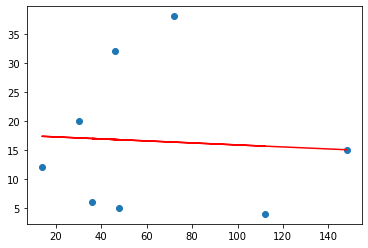

In [146]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')

In [147]:
X = np.array(df_EasternWa["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_EasternWa["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

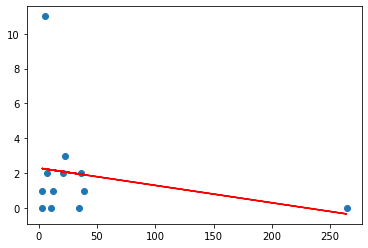

In [148]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')

In [149]:
X = np.array(df_WesternWa["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_WesternWa["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

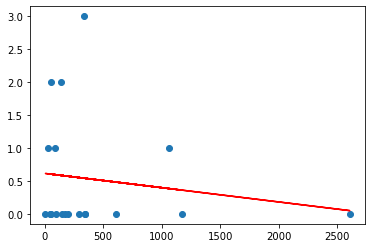

In [150]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')